In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
%matplotlib inline

In [3]:
cols = [
    'Country',
    'Quality of Life Index',
    'Purchasing Power Index',
    'Safety Index',
    'Health Care Index',
    'Cost of Living Index',
    'Property Price to Income Ratio',
    'Traffic Commute Time Index',
    'Pollution Index',
    'Climate Index',
]

data = pd.read_csv('country_data.csv', '\t', header=None).set_index(0)
data.columns = cols

In [42]:
data.corr()

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Quality of Life Index,1.000000,0.845470,0.539487,0.534317,0.738037,-0.543612,-0.610053,-0.887811,0.079106
Purchasing Power Index,0.845470,1.000000,0.395946,0.554424,0.768009,-0.421466,-0.360871,-0.644878,-0.124567
Safety Index,0.539487,0.395946,1.000000,0.298444,0.408453,0.000172,-0.418476,-0.400095,-0.192092
Health Care Index,0.534317,0.554424,0.298444,1.000000,0.552333,0.020971,-0.053218,-0.424165,0.047542
Cost of Living Index,0.738037,0.768009,0.408453,0.552333,1.000000,-0.175095,-0.368542,-0.658603,0.119832
Property Price to Income Ratio,-0.543612,-0.421466,0.000172,0.020971,-0.175095,1.000000,0.399127,0.369080,0.048230
Traffic Commute Time Index,-0.610053,-0.360871,-0.418476,-0.053218,-0.368542,0.399127,1.000000,0.527590,0.001670
Pollution Index,-0.887811,-0.644878,-0.400095,-0.424165,-0.658603,0.369080,0.527590,1.000000,-0.063174
Climate Index,0.079106,-0.124567,-0.192092,0.047542,0.119832,0.048230,0.001670,-0.063174,1.000000


In [50]:
data.loc[data['Country'] == 'Hong Kong']

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,,,,,,,,,,
63,Hong Kong,100.9,69.34,80.68,67.35,78.14,49.42,41.0,66.39,83.64


In [120]:
col_color = {
    'Quality of Life Index': '#e41a1c',
    'Pollution Index': '#a65628',
    'Cost of Living Index': '#4daf4a',
    'Climate Index': '#377eb8',
    'Purchasing Power Index': '#000000',
    'Traffic Commute Time Index': '#ffff33',
    'Safety Index': '#999999',
    'Health Care Index': '#984ea3',
    'Property Price to Income Ratio': '#f781bf'
}

('Pollution Index', 'Quality of Life Index')


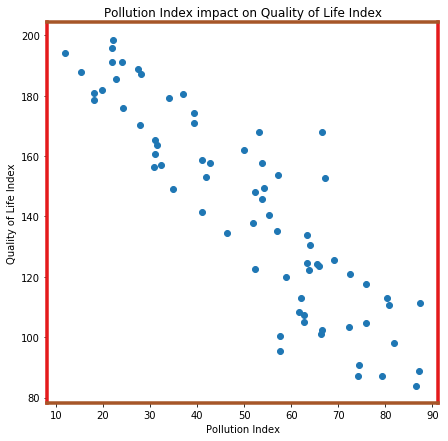

('Cost of Living Index', 'Quality of Life Index')


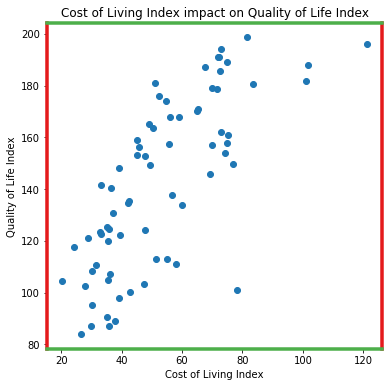

('Property Price to Income Ratio',)


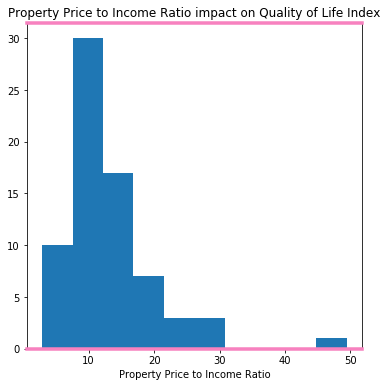

('Climate Index', 'Quality of Life Index')


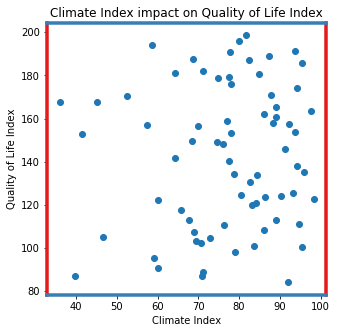

('Purchasing Power Index', 'Quality of Life Index')


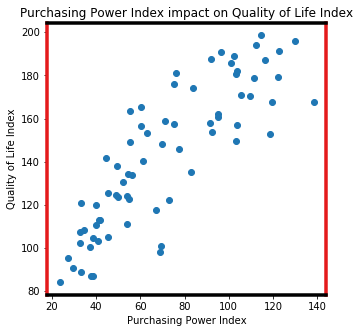

('Traffic Commute Time Index', 'Pollution Index')


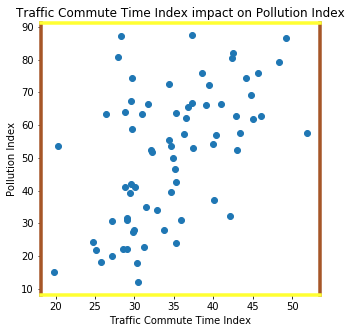

In [121]:
# plt.figure(figsize=(7, 7))
# plt.plot(data['Property Price to Income Ratio'], data['Cost of Living Index'], 'o')
# plt.xlabel('Property Price to Income Ratio')
# plt.ylabel('Cost of Living Index')
# plt.show()

# plt.figure(figsize=(8, 8))
cols = [('Pollution Index', 'Quality of Life Index'), 
        ('Cost of Living Index', 'Quality of Life Index'), 
        ('Property Price to Income Ratio',), 
        ('Climate Index', 'Quality of Life Index'), 
        ('Purchasing Power Index', 'Quality of Life Index'), 
        ('Traffic Commute Time Index', 'Pollution Index')]
sizes = [7, 6, 6, 5, 5, 5]
width = 3.5

for col, size in zip(cols, sizes):
    plt.rcParams["figure.figsize"] = (size, size)
    fig, ax = plt.subplots()
    print(col)
    if len(col) == 1:
        col1 = col[0]
        color = col_color[col1]
        for axis in ['bottom', 'top']:
            ax.spines[axis].set_color(color)
            ax.spines[axis].set_linewidth(width)
        plt.sca(ax)
        plt.hist(data[col1])
    else:
        col1 = col[0]
        col2 = col[1]
        color1 = col_color[col1]
        color2 = col_color[col2]
        for axis in ['bottom', 'top']:
            ax.spines[axis].set_color(color1)
            ax.spines[axis].set_linewidth(width)
        for axis in ['left', 'right']:
            ax.spines[axis].set_color(color2)
            ax.spines[axis].set_linewidth(width)
        plt.sca(ax)
        plt.plot(data[col1], data[col2], 'o')
        plt.ylabel(col2)
    plt.xlabel(col1)
    plt.title(col1 + " impact on " + col2)
    plt.savefig(col1 + '_' + col2 + '.png')
    plt.show()


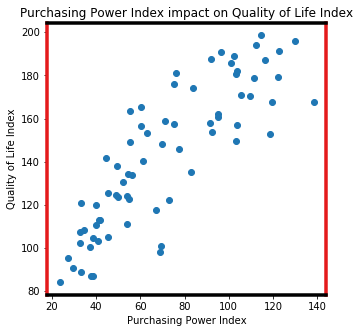

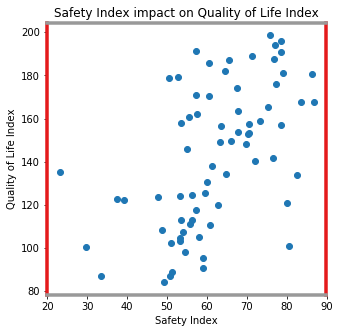

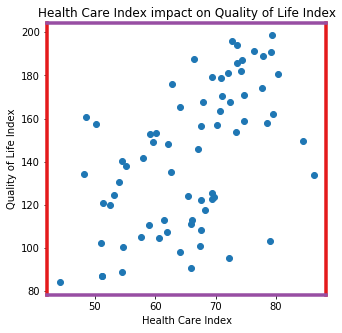

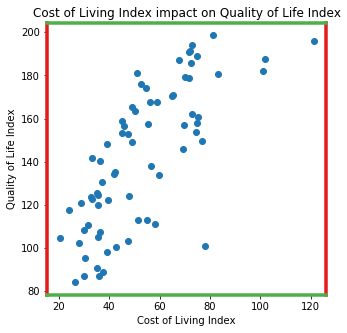

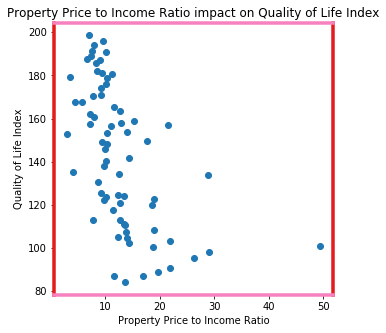

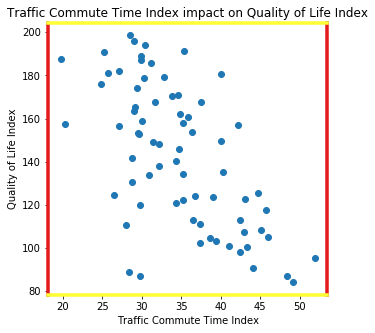

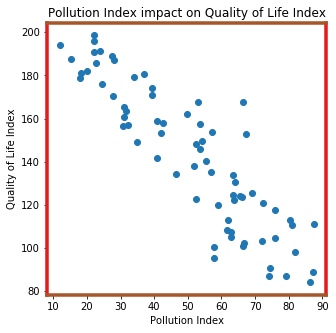

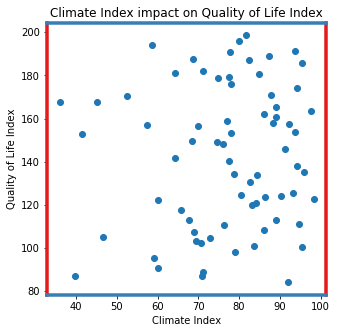

In [122]:
for col in data.columns[2:]:
    plt.rcParams["figure.figsize"] = (5, 5)
    fig, ax = plt.subplots()
    col1 = col
    col2 = 'Quality of Life Index'
    color1 = col_color[col1]
    color2 = col_color[col2]
    for axis in ['bottom', 'top']:
        ax.spines[axis].set_color(color1)
        ax.spines[axis].set_linewidth(width)
    for axis in ['left', 'right']:
        ax.spines[axis].set_color(color2)
        ax.spines[axis].set_linewidth(width)
    plt.sca(ax)
    plt.plot(data[col1], data[col2], 'o')
    plt.ylabel(col2)
    plt.xlabel(col1)
    plt.title(col1 + " impact on " + col2)
    plt.savefig(col1 + '_' + col2 + '_small.png')
    plt.show()

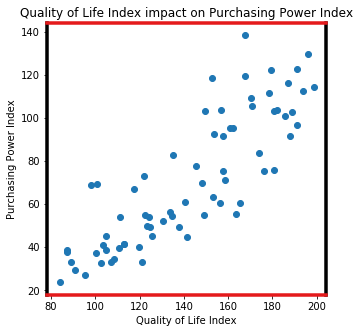

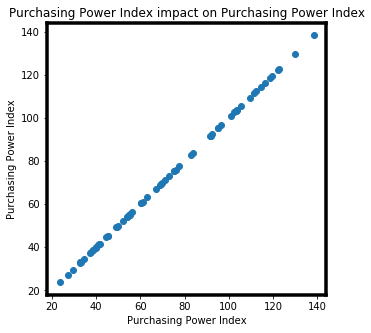

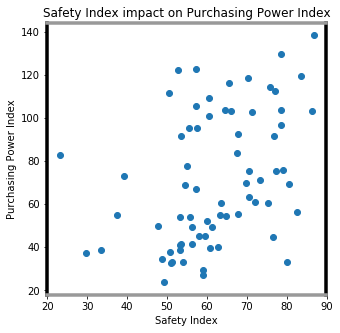

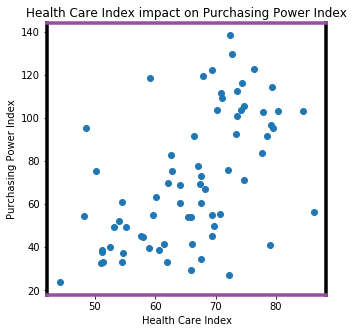

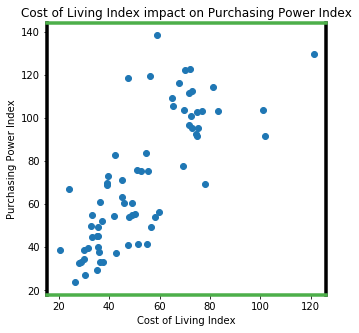

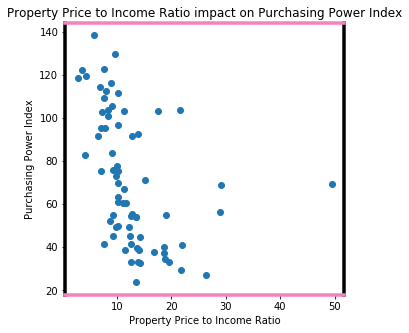

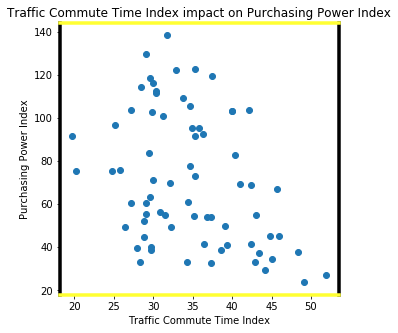

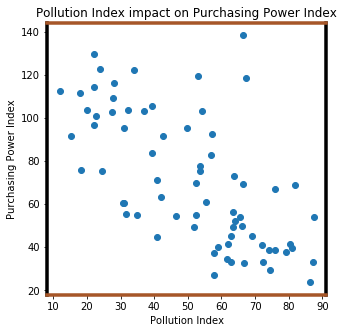

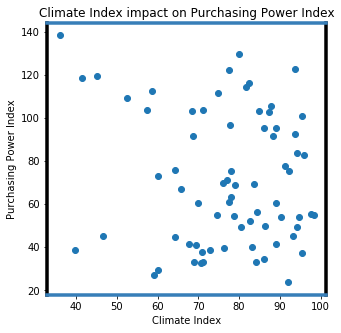

In [123]:
for col in data.columns[1:]:
    plt.rcParams["figure.figsize"] = (5, 5)
    fig, ax = plt.subplots()
    col1 = col
    col2 = 'Purchasing Power Index'
    color1 = col_color[col1]
    color2 = col_color[col2]
    for axis in ['bottom', 'top']:
        ax.spines[axis].set_color(color1)
        ax.spines[axis].set_linewidth(width)
    for axis in ['left', 'right']:
        ax.spines[axis].set_color(color2)
        ax.spines[axis].set_linewidth(width)
    plt.sca(ax)
    plt.plot(data[col1], data[col2], 'o')
    plt.ylabel(col2)
    plt.xlabel(col1)
    plt.title(col1 + " impact on " + col2)
    plt.savefig(col1 + '_' + col2 + '_small.png')
    plt.show()

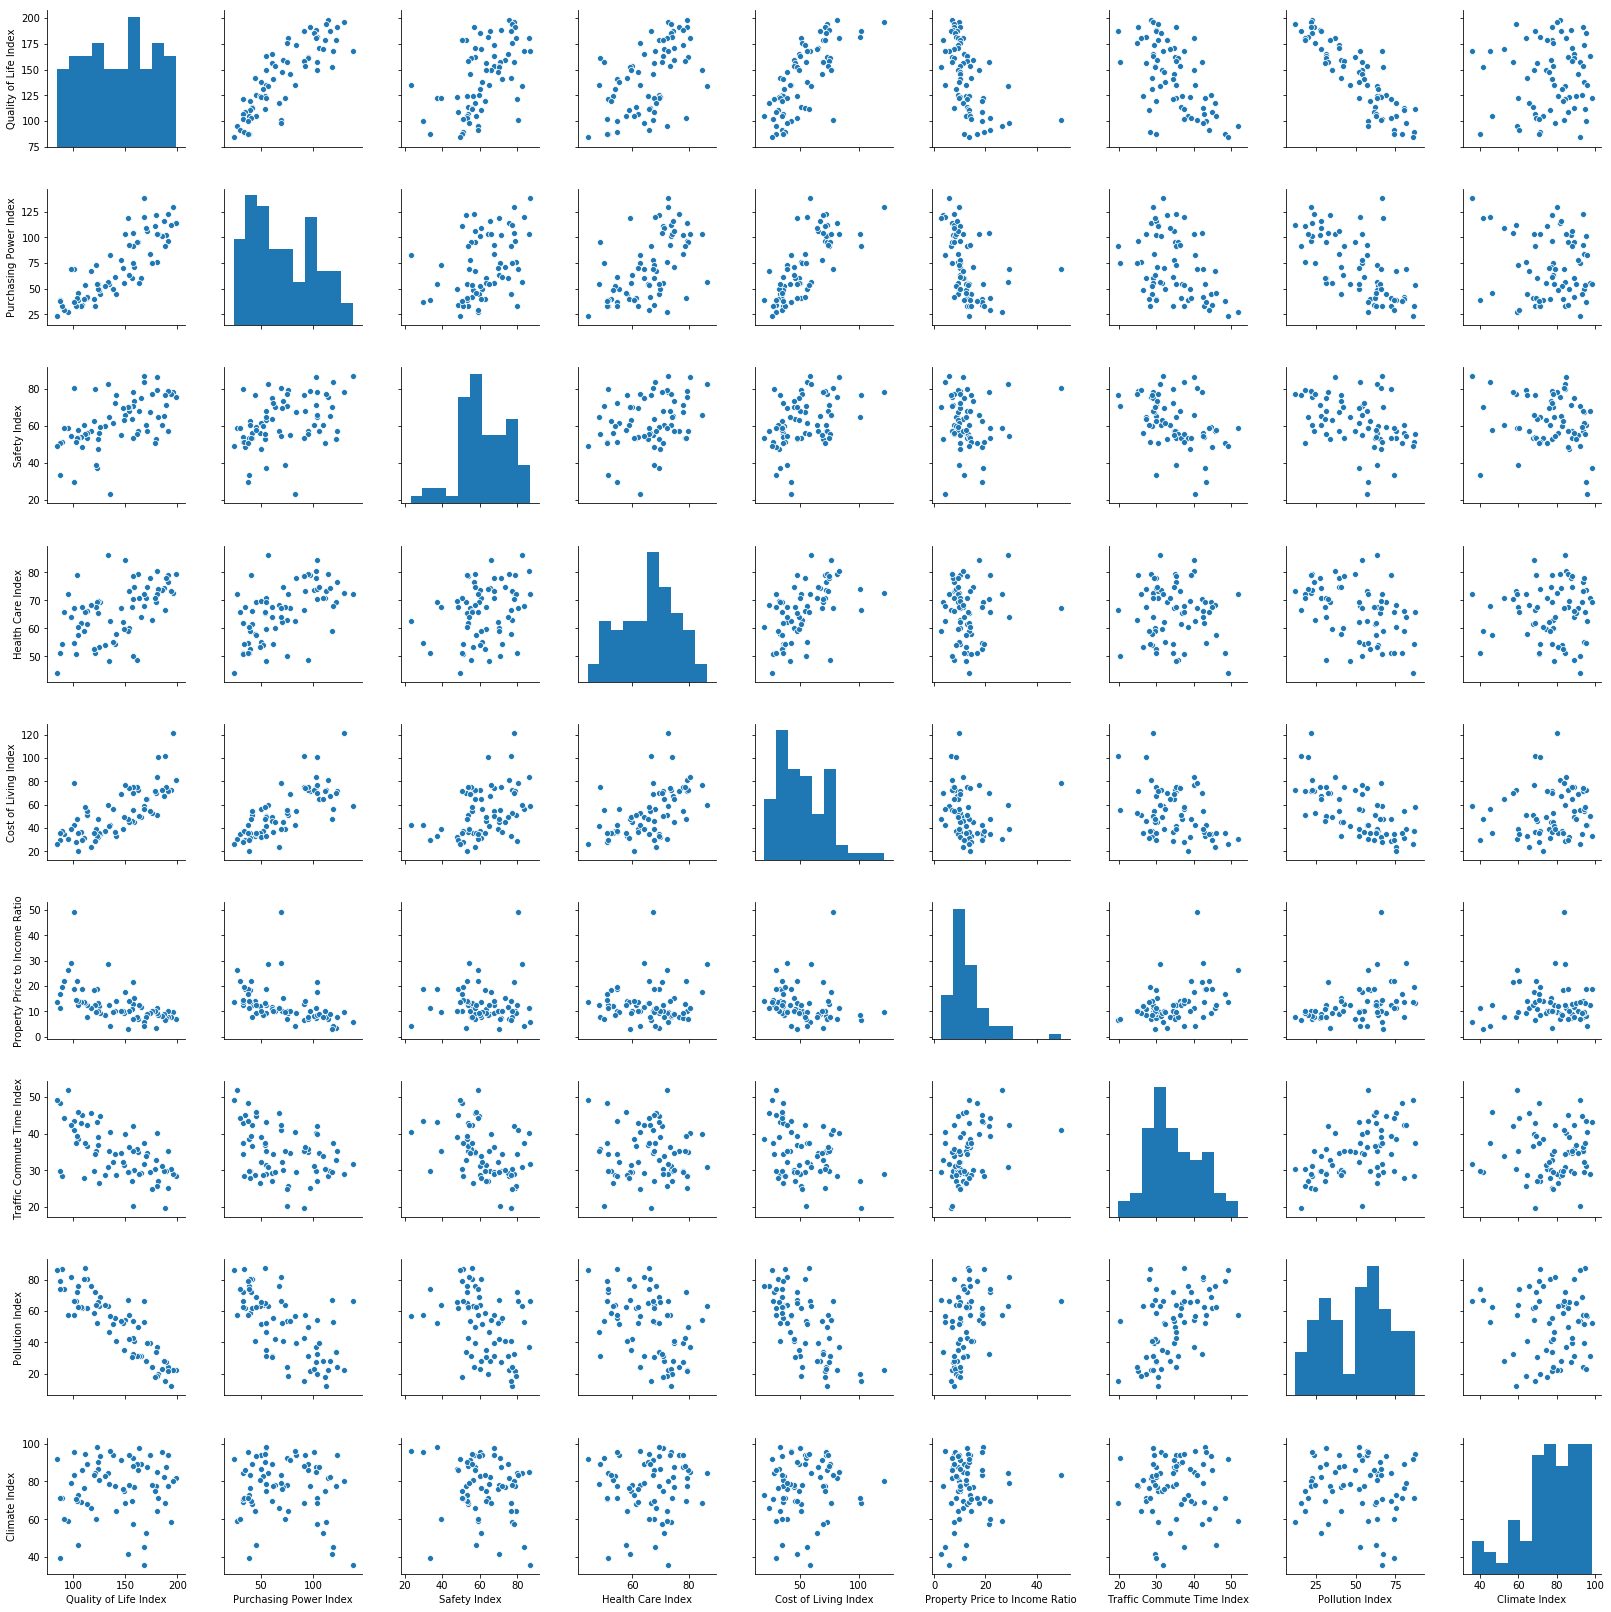

In [45]:
sns.pairplot(data)

In [37]:
def quartilise(data, col):
    q = list(data[col].quantile([0.25, 0.5, 0.75]))
    col_q = data[col]
    col_q = ['low' if c <= q[0] 
             else 'medium_low' if c <= q[1] 
             else 'medium_high' if c <= q[2] 
             else 'high' 
             for c in col_q]
    
    return col_q

In [38]:
def properties(key):
    return {'color': '#ff8b8b' if key[1] == 'high' 
            else '#f5ffa2' if key[1] == 'medium_high' 
            else '#aaffa2' if key[1] == 'medium_low'
            else '#9fd1ff'}

/home/aga/.virtualenvs/visard/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/aga/.virtualenvs/visard/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/aga/.virtualenvs/visard/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/aga/.virtualenvs/visard/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/aga/.virtualenvs/visard/li

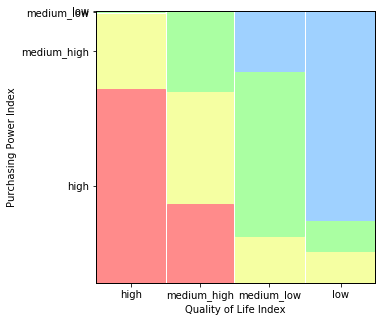

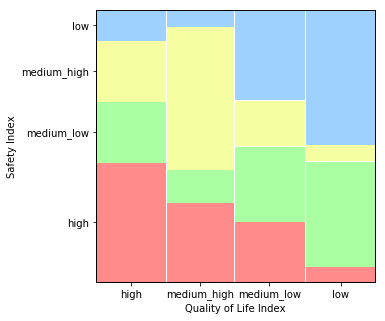

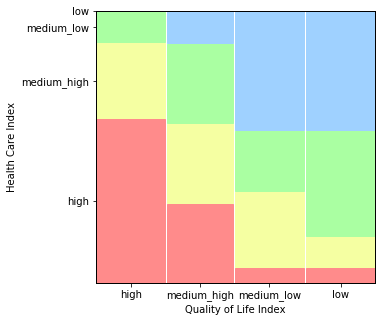

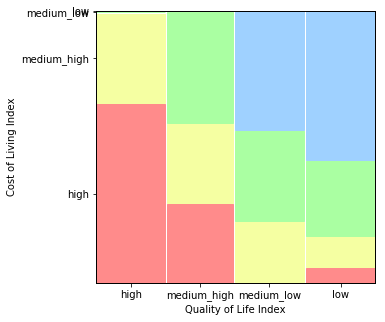

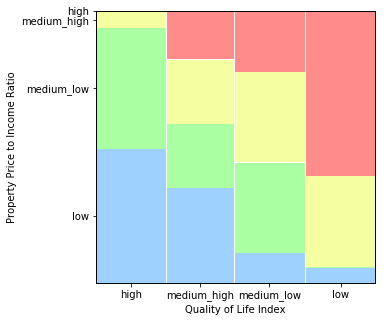

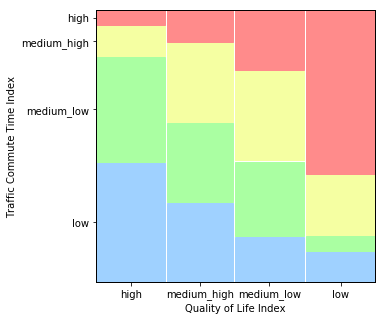

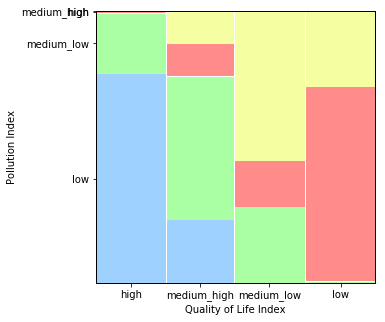

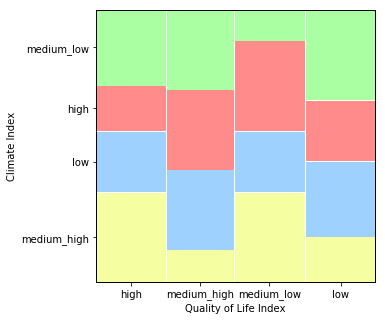

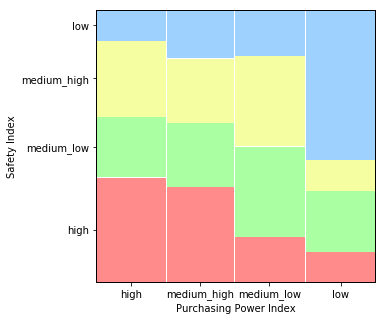

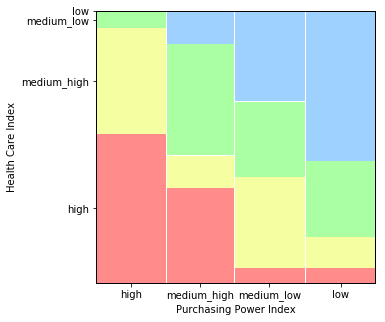

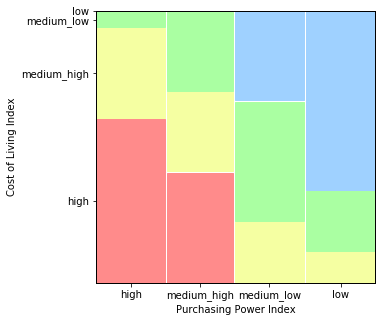

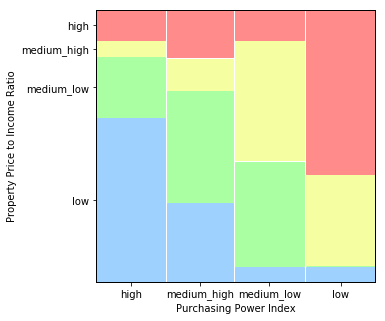

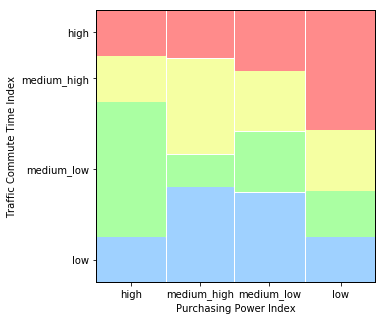

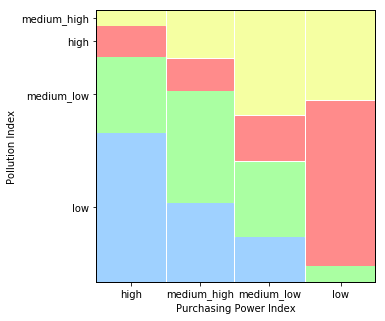

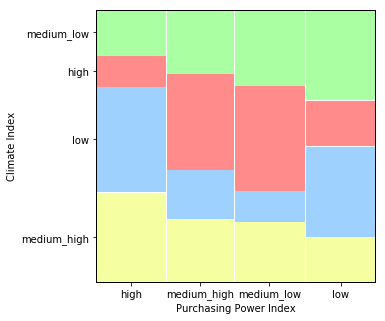

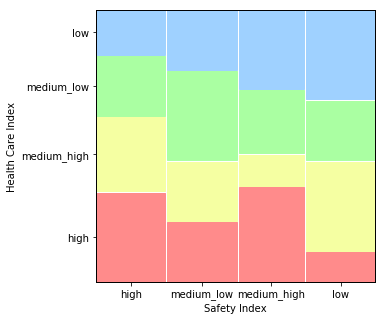

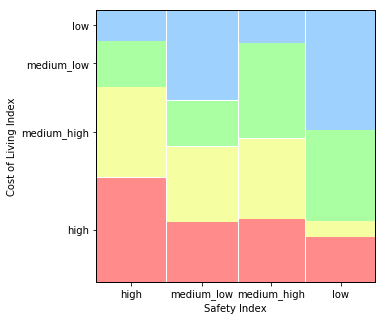

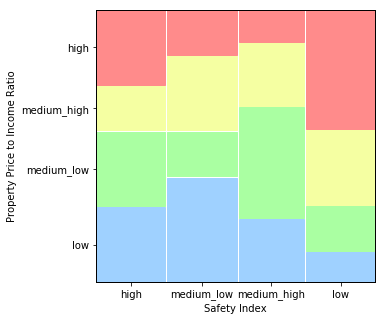

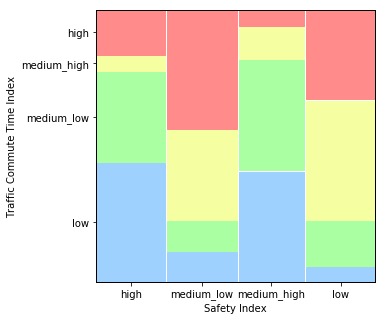

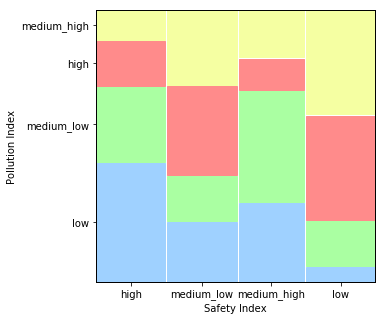

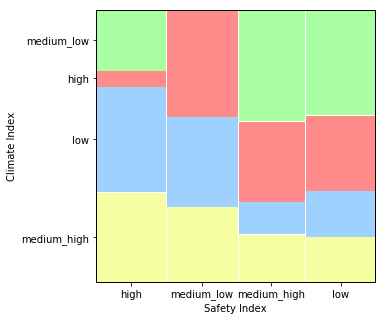

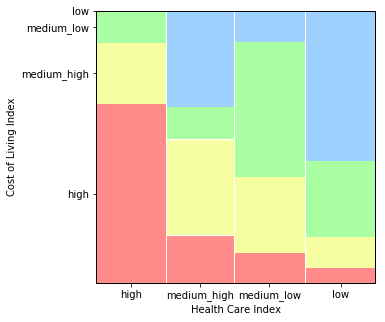

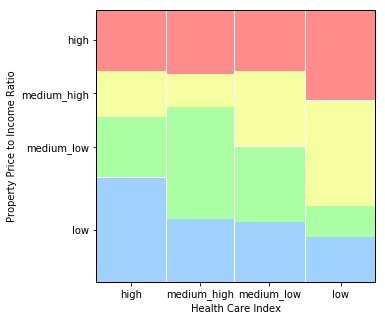

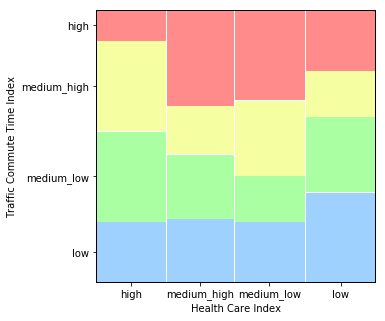

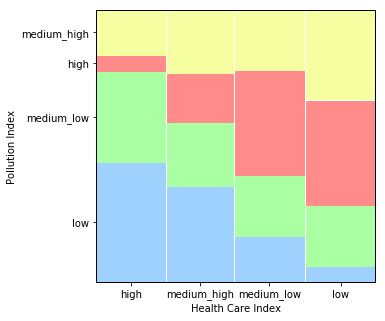

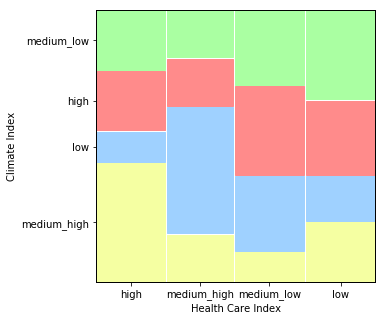

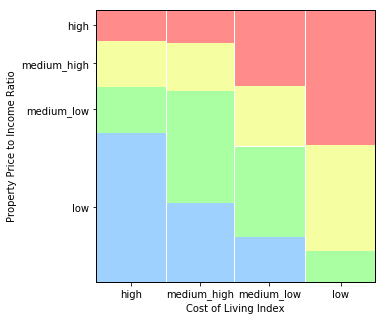

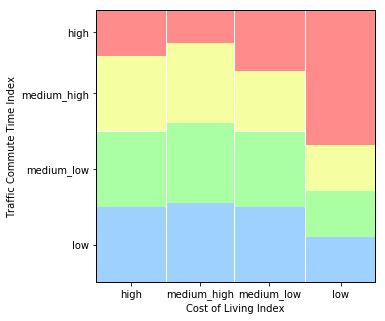

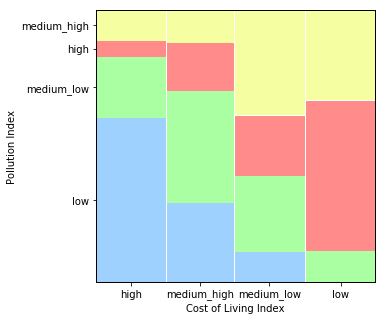

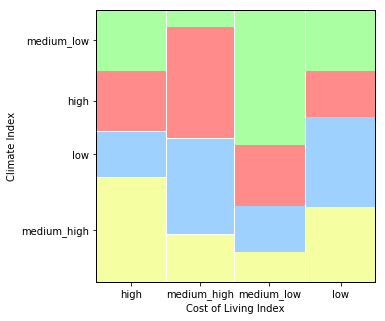

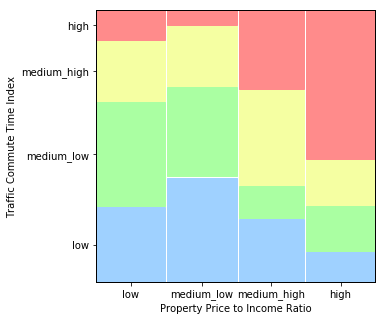

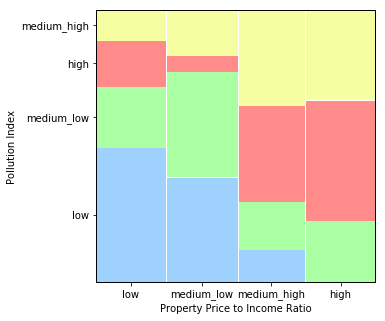

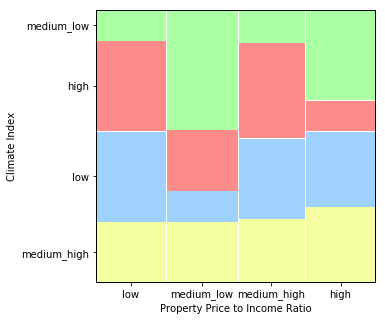

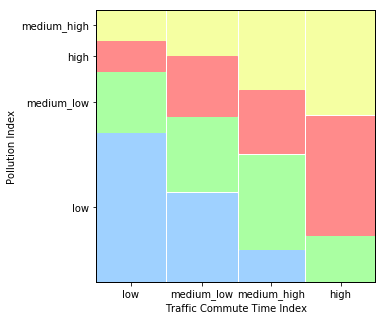

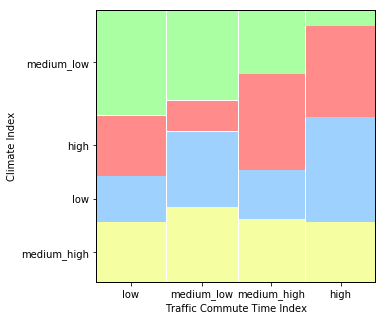

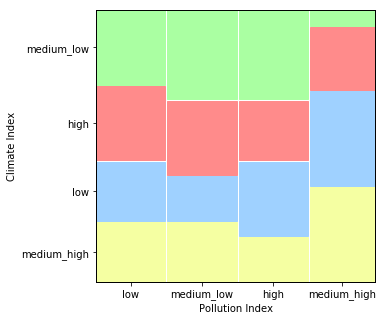

In [41]:
for i, col1 in enumerate(cols[1:]):
    col1_q = quartilise(data, col1)
    for col2 in cols[i+1:]:
        if col1 != col2:
            col2_q = quartilise(data, col2)
            data_tmp = pd.DataFrame({col1: col1_q, col2: col2_q})
            fig, ax = plt.subplots()
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
            fig, rects = mosaic(data_tmp, [col1, col2], ax=ax, labelizer=lambda x: None,
                                axes_label=True, gap=0.007, properties=properties)
            fig.set_size_inches(5, 5)
            plt.savefig(col1 + '_' + col2 + '.png')
            fig.show()
#             break

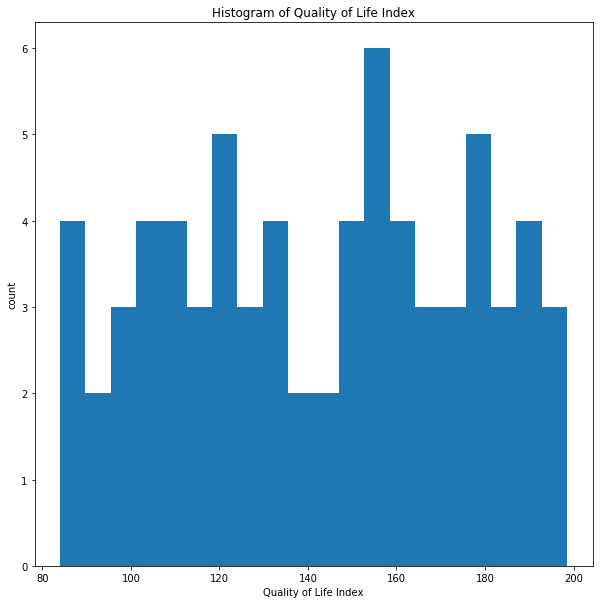

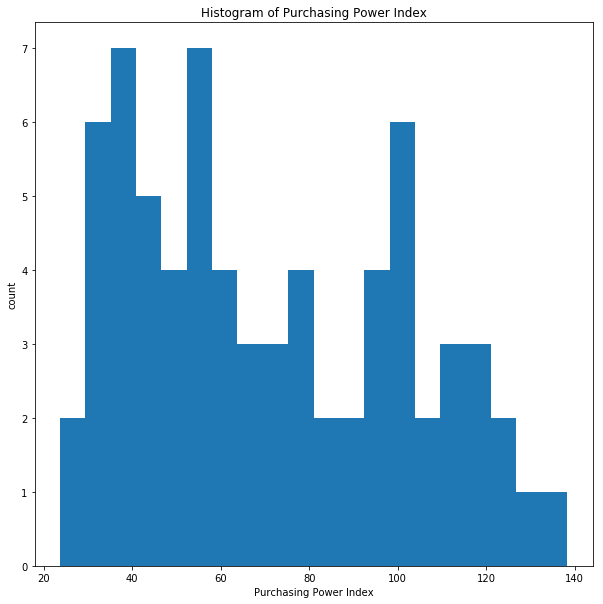

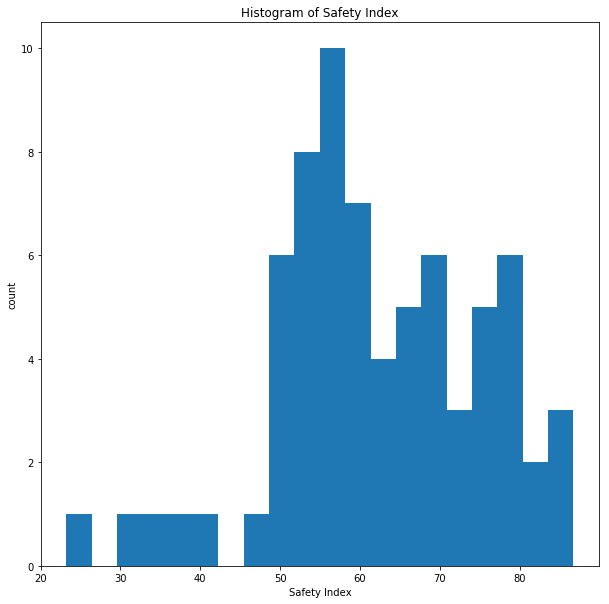

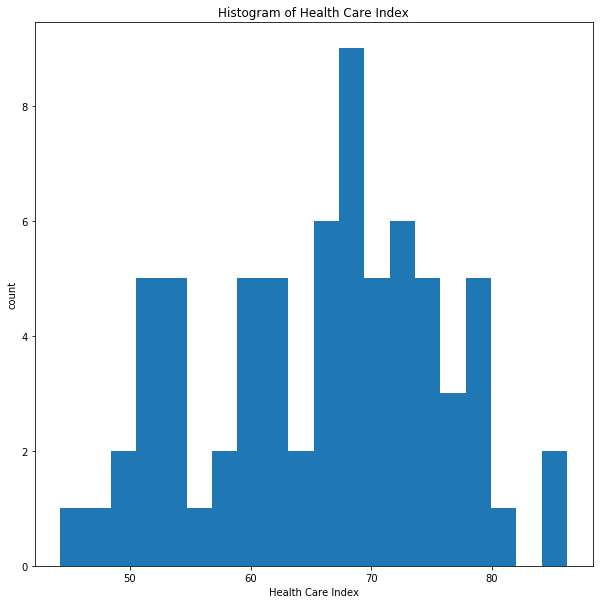

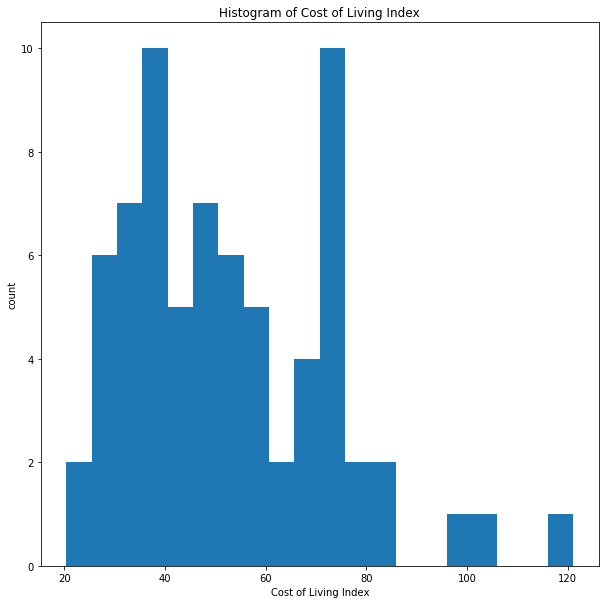

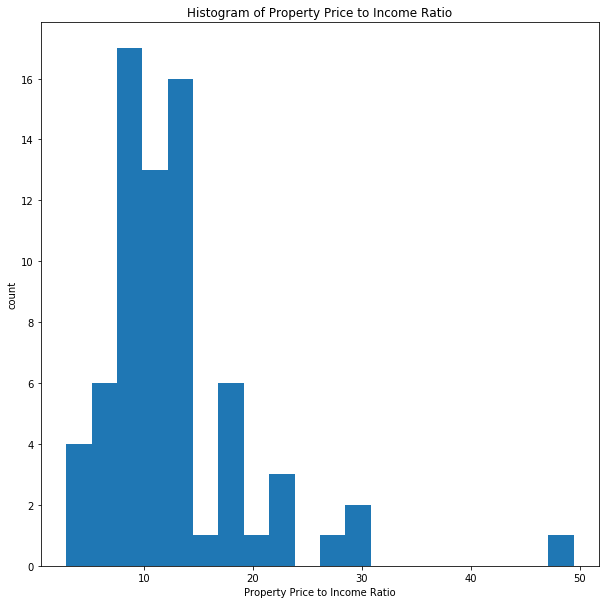

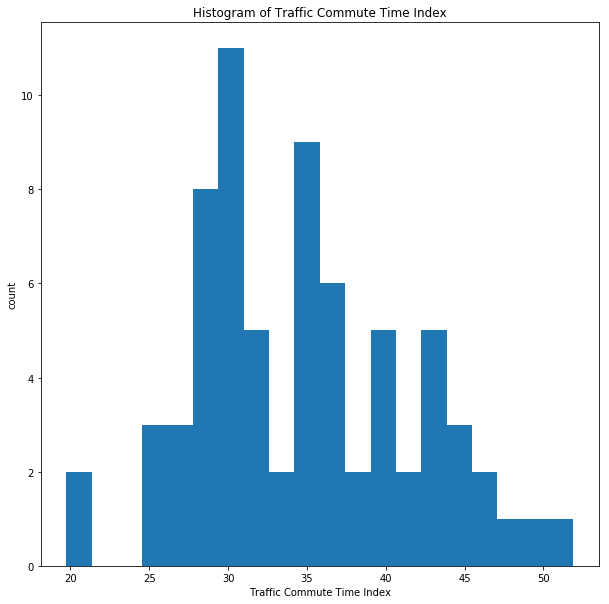

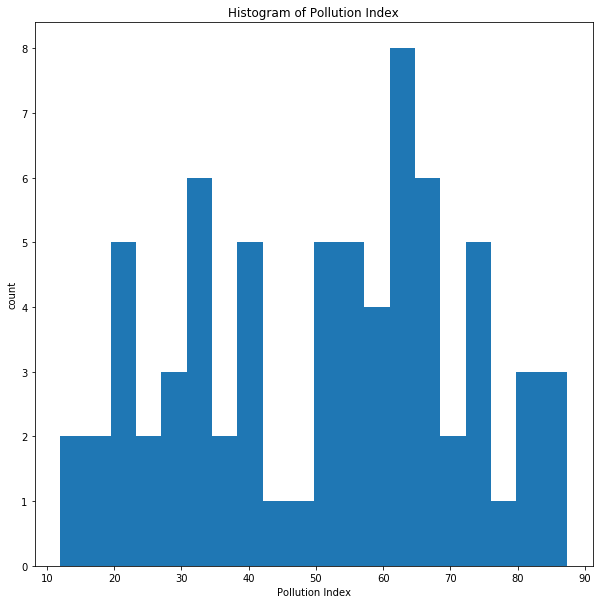

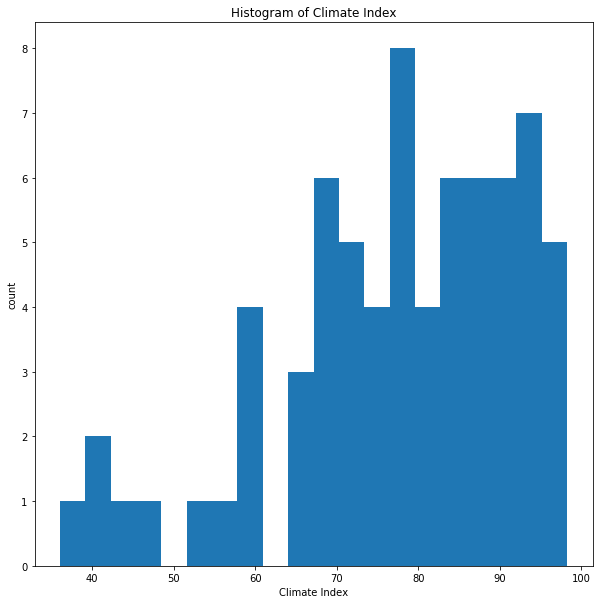

In [36]:
for col in cols[1:]:
    plt.figure(figsize=(10, 10))
    plt.hist(data[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Histogram of ' + col)
    plt.savefig(col, dpi=100)
    plt.show()